In [1]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ML-Project/PII-DATA'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Load the CSV data into a DataFrame
data = pd.read_csv('/content/drive/My Drive/ML-Project/PII-DATA/cleandata.csv')

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(data)


         document       token  label
0               7      Design      0
1               7    Thinking      0
2               7         for      0
3               7  innovation      0
4               7   reflexion      0
...           ...         ...    ...
5807713     29433     overall      0
5807714     29433     success      0
5807715     29433          of      0
5807716     29433         the      0
5807717     29433     project      0

[5807718 rows x 3 columns]


In [3]:
data['label'].value_counts()

label
0     5765152
1       12469
11       8593
2        6763
4        3833
10       3545
9        3404
8        2425
3         730
7         724
5          78
6           1
12          1
Name: count, dtype: int64

In [4]:
id2labels = {
    0: 'O',
    1: 'B-NAME_STUDENT',
    2: 'I-NAME_STUDENT',
    3: 'B-URL_PERSONAL',
    4: 'B-EMAIL',
    5: 'B-ID_NUM',
    6: 'I-URL_PERSONAL',
    7: 'B-USERNAME',
    8: 'B-PHONE_NUM',
    9: 'I-PHONE_NUM',
    10: 'B-STREET_ADDRESS',
    11: 'I-STREET_ADDRESS',
    12: 'I-ID_NUM'
}

In [5]:
data['label'] = data['label'].replace(id2labels)

In [6]:
data['label'].value_counts()

label
O                   5765152
B-NAME_STUDENT        12469
I-STREET_ADDRESS       8593
I-NAME_STUDENT         6763
B-EMAIL                3833
B-STREET_ADDRESS       3545
I-PHONE_NUM            3404
B-PHONE_NUM            2425
B-URL_PERSONAL          730
B-USERNAME              724
B-ID_NUM                 78
I-URL_PERSONAL            1
I-ID_NUM                  1
Name: count, dtype: int64

In [7]:
rows_with_b_phone = data[data['label'] == 'B-EMAIL']


In [8]:
rows_with_b_phone.head(150)

,document,token,label
17826,379,djones@gmail.com,B-EMAIL
62593,2769,matthew72@hotmail.com,B-EMAIL
94292,3709,belindarojas@yahoo.com,B-EMAIL
94294,3709,kennethevans@hotmail.com,B-EMAIL
122848,4227,agood@gmail.com,B-EMAIL
...,...,...,...
4471560,25123,taio_o'donnell3669@hotmailedu,B-EMAIL
4471906,25124,adrianliu@gmailnet),B-EMAIL
4472200,25125,ludmila_gonzalez5973@hotmailgov,B-EMAIL
4472538,25126,aiguolopez@msncom,B-EMAIL


In [9]:
# import pandas as pd

# labels_to_remove = ['B-URL_PERSONAL', 'B-USERNAME', 'B-ID_NUM', 'I-URL_PERSONAL', 'I-ID_NUM','I-PHONE_NUM','B-PHONE_NUM','I-STREET_ADDRESS','B-STREET_ADDRESS']

# # Removing the rows that contain the highlighted labels
# data_cleaned = data[~data['label'].isin(labels_to_remove)]


In [10]:
data_cleaned= data

In [11]:
data_cleaned['label'].value_counts()

label
O                   5765152
B-NAME_STUDENT        12469
I-STREET_ADDRESS       8593
I-NAME_STUDENT         6763
B-EMAIL                3833
B-STREET_ADDRESS       3545
I-PHONE_NUM            3404
B-PHONE_NUM            2425
B-URL_PERSONAL          730
B-USERNAME              724
B-ID_NUM                 78
I-URL_PERSONAL            1
I-ID_NUM                  1
Name: count, dtype: int64

In [12]:
data_cleaned

,document,token,label
0,7,Design,O
1,7,Thinking,O
2,7,for,O
3,7,innovation,O
4,7,reflexion,O
...,...,...,...
5807713,29433,overall,O
5807714,29433,success,O
5807715,29433,of,O
5807716,29433,the,O


In [13]:
data_cleaned.dtypes

document     int64
token       object
label       object
dtype: object

In [14]:
def is_valid_token(token):
    # Convert to string in case the token is not already a string (e.g., float or int)
    token = str(token)
    return token.isalpha() or token.isdigit()

# Apply the function to the 'token' column and keep only the rows with valid tokens
data1 = data_cleaned[data_cleaned['token'].apply(is_valid_token)]


In [15]:
data1

,document,token,label
0,7,Design,O
1,7,Thinking,O
2,7,for,O
3,7,innovation,O
4,7,reflexion,O
...,...,...,...
5807713,29433,overall,O
5807714,29433,success,O
5807715,29433,of,O
5807716,29433,the,O


In [16]:
data1['label'].value_counts()

label
O                   5430553
B-NAME_STUDENT        10191
I-STREET_ADDRESS       8238
I-NAME_STUDENT         6292
B-STREET_ADDRESS       3490
I-PHONE_NUM            2851
B-PHONE_NUM             837
B-USERNAME              168
B-ID_NUM                 59
B-URL_PERSONAL           43
I-URL_PERSONAL            1
I-ID_NUM                  1
Name: count, dtype: int64

In [17]:
#Ensure df is your original DataFrame with 'document', 'token', and 'label' columns
grouped = data1.groupby('document').agg(lambda x: list(x)).reset_index()


In [18]:
grouped

,document,token,label
0,7,"[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, B-NAME_STUDENT, I-NAME_S..."
1,10,"[Diego, Estrada, Design, Thinking, Assignment,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,"[Reporting, process, by, Gilberto, Gamboa, Cha...","[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."
3,20,"[Design, Thinking, for, Innovation, Sindy, Sam...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
4,56,"[Assignment, Visualization, Reflection, Submit...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
...,...,...,...
11236,29429,"[Hello, Nicholas, Moore, a, man, with, a, rich...","[O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O..."
11237,29430,"[Hello, my, name, is, Alexey, Novikov, and, a,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
11238,29431,"[My, name, is, Ludmila, Inoue, and, a, person,...","[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."
11239,29432,"[Dr, Tu, Garcia, a, renowned, dermatologist, e...","[O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O..."


In [19]:
# Assume 'grouped' is your DataFrame that has been grouped by 'document' with lists of 'token' and 'label'.

# Choose the first document to print as an example
example_document = grouped.iloc[7]

# Print the document id
print(f"Document ID: {example_document['document']}")

# Print each token and its corresponding label
for token, label in zip(example_document['token'], example_document['label']):
    print(f"{token} ({label})")


Document ID: 104
Storytelling (O)
The (O)
Path (O)
to (O)
Innovation (O)
Dr (O)
Sakir (B-NAME_STUDENT)
Ahmad (I-NAME_STUDENT)
Challenge (O)
Selection (O)
Be (O)
it (O)
any (O)
organization (O)
team (O)
or (O)
a (O)
government (O)
venture (O)
I (O)
have (O)
often (O)
observed (O)
that (O)
they (O)
experience (O)
failures (O)
because (O)
they (O)
could (O)
connect (O)
with (O)
their (O)
audience (O)
aptly (O)
In (O)
such (O)
scenarios (O)
storytelling (O)
can (O)
turn (O)
the (O)
table (O)
significantly (O)
I (O)
have (O)
used (O)
the (O)
tool (O)
storytelling (O)
in (O)
my (O)
organization (O)
to (O)
convey (O)
a (O)
complicated (O)
message (O)
as (O)
simply (O)
as (O)
possible (O)
or (O)
to (O)
generate (O)
ideas (O)
from (O)
people (O)
around (O)
me (O)
The (O)
idea (O)
is (O)
to (O)
implement (O)
this (O)
innovative (O)
tool (O)
to (O)
make (O)
the (O)
intricate (O)
issues (O)
understandable (O)
and (O)
engage (O)
the (O)
targeted (O)
audience (O)
I (O)
relayed (O)
the (O)
context (O

In [20]:
import pandas as pd
def create_sentence_and_label_seq(row):
    # Convert all elements to strings and concatenate tokens into a single string
    sentence = ' '.join(map(str, row['token']))
    # The label sequence is expected to be a list of strings, make sure this is the case
    label_seq = list(map(str, row['label']))
    return pd.Series([sentence, label_seq], index=['sentence', 'label_seq'])

df = pd.DataFrame(grouped)
# Apply the function to the DataFrame
df[['sentence', 'label_seq']] = df.apply(create_sentence_and_label_seq, axis=1)

# Display the resulting DataFrame
df[['sentence', 'label_seq']]

,sentence,label_seq
0,Design Thinking for innovation reflexion Avril...,"[O, O, O, O, O, O, O, B-NAME_STUDENT, I-NAME_S..."
1,Diego Estrada Design Thinking Assignment Visua...,"[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,Reporting process by Gilberto Gamboa Challenge...,"[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."
3,Design Thinking for Innovation Sindy Samaca Gi...,"[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
4,Assignment Visualization Reflection Submitted ...,"[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
...,...,...
11236,Hello Nicholas Moore a man with a rich tapestr...,"[O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O..."
11237,Hello my name is Alexey Novikov and a psycholo...,"[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
11238,My name is Ludmila Inoue and a person with a s...,"[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."
11239,Dr Tu Garcia a renowned dermatologist embarked...,"[O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O..."


In [21]:
type(df['sentence'])

pandas.core.series.Series

In [22]:
# Check the first few entries in the 'sentence' column
print(df['sentence'].head())

# Check the first few entries in the 'label_seq' column
print(df['label_seq'].head())

# Verify that each entry in 'sentence' is a string
print(all(isinstance(x, str) for x in df['sentence']))

# Verify that each entry in 'label_seq' is a list of strings
print(all(isinstance(x, list) and all(isinstance(y, str) for y in x) for x in df['label_seq']))


0    Design Thinking for innovation reflexion Avril...
1    Diego Estrada Design Thinking Assignment Visua...
2    Reporting process by Gilberto Gamboa Challenge...
3    Design Thinking for Innovation Sindy Samaca Gi...
4    Assignment Visualization Reflection Submitted ...
Name: sentence, dtype: object
0    [O, O, O, O, O, O, O, B-NAME_STUDENT, I-NAME_S...
1    [B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...
2    [O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O...
3    [O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...
4    [O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...
Name: label_seq, dtype: object
True
True


In [23]:
final= df[['sentence','label_seq']]
final

,sentence,label_seq
0,Design Thinking for innovation reflexion Avril...,"[O, O, O, O, O, O, O, B-NAME_STUDENT, I-NAME_S..."
1,Diego Estrada Design Thinking Assignment Visua...,"[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,Reporting process by Gilberto Gamboa Challenge...,"[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."
3,Design Thinking for Innovation Sindy Samaca Gi...,"[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
4,Assignment Visualization Reflection Submitted ...,"[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
...,...,...
11236,Hello Nicholas Moore a man with a rich tapestr...,"[O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O..."
11237,Hello my name is Alexey Novikov and a psycholo...,"[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
11238,My name is Ludmila Inoue and a person with a s...,"[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."
11239,Dr Tu Garcia a renowned dermatologist embarked...,"[O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O..."


In [24]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Function to align labels with tokenized input
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples['sentence'], truncation=True, padding='max_length', max_length=128)
    labels = []
    for i, label in enumerate(examples['label_seq']):
        word_ids = tokenized_inputs.word_ids(batch_index=i)  # Map tokens to their word in the input
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:  # Set the label for each token
            if word_idx is None:
                label_ids.append(-100)  # Special tokens have a label of -100
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])  # Only label the first token of a given word
            else:
                label_ids.append(label[word_idx].replace("B-", "I-"))  # If the word is split, the subsequent tokens get an I- label
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

# Apply function to the entire dataset
tokenized_dataset = tokenize_and_align_labels(final.to_dict(orient='list'))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [25]:
import torch
from torch.utils.data import TensorDataset, random_split

label_map= {'O': 0,
 'B-NAME_STUDENT': 1,
 'I-NAME_STUDENT': 2,
 'B-URL_PERSONAL': 3,
 'B-EMAIL': 4,
 'B-ID_NUM': 5,
 'I-URL_PERSONAL': 6,
 'B-USERNAME': 7,
 'B-PHONE_NUM': 8,
 'I-PHONE_NUM': 9,
 'B-STREET_ADDRESS': 10,
 'I-STREET_ADDRESS': 11,
 'I-ID_NUM': 12}

# Function to map labels to their integer values, keeping -100 as a special case
def map_labels(label_sequence):
    return [label_map.get(label, -100) for label in label_sequence]  # Get from map, default to -100

# Apply the mapping function to each label sequence
mapped_labels = [map_labels(seq) for seq in tokenized_dataset['labels']]

# Convert the input_ids and attention_mask to integers as well (they should already be integers)
input_ids = [seq for seq in tokenized_dataset['input_ids']]
attention_mask = [seq for seq in tokenized_dataset['attention_mask']]

# Create the TensorDataset
full_dataset = TensorDataset(
    torch.tensor(input_ids, dtype=torch.long),
    torch.tensor(attention_mask, dtype=torch.long),
    torch.tensor(mapped_labels, dtype=torch.long)
)

# Split the dataset into training, validation, and test sets (80%, 10%, 10%)
train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])



In [26]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertForTokenClassification, AdamW
from transformers import get_linear_schedule_with_warmup
import torch
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

batch_size = 16  # Set the batch size

train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),  # Sampling for training is random
    batch_size=batch_size
)

validation_dataloader = DataLoader(
    val_dataset,
    sampler=SequentialSampler(val_dataset),  # Sampling for validation is sequential
    batch_size=batch_size
)

test_dataloader = DataLoader(
    test_dataset,
    sampler=SequentialSampler(test_dataset),  # Sampling for testing is sequential
    batch_size=batch_size
)

In [27]:
from transformers import BertForTokenClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
import torch
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.metrics import accuracy_score

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=2).flatten()
    labels_flat = labels.flatten()
    return accuracy_score(labels_flat, pred_flat)

# Assuming that `train_dataloader` has been defined and is available
# Assuming `label_map` has been defined and maps class labels to integers

# Calculate class weights
all_labels = torch.cat([batch[2] for batch in train_dataloader])
label_ids = all_labels.numpy().flatten()
class_weights = compute_class_weight('balanced', classes=np.unique(label_ids), y=label_ids)

# Convert class weights to a tensor
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
weights = torch.tensor(class_weights, dtype=torch.float, device=device)

# Initialize the loss function with class weights
loss_function = torch.nn.CrossEntropyLoss(weight=weights)

# Load the pre-trained BERT model with a classification head
model = BertForTokenClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(label_map),  # The number of distinct labels
    output_attentions=False,
    output_hidden_states=False,
)

model.to(device)

# Initialize the optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=5e-5, eps=1e-8)
epochs = 5  # Define the number of epochs
total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [28]:

# Training loop
for epoch_i in range(epochs):
    print(f'Epoch {epoch_i + 1} of {epochs}')

    # Training phase
    model.train()
    total_train_loss = 0

    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        model.zero_grad()

        # Perform a forward pass of the model
        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        total_train_loss += loss.item()

        # Backward pass to calculate the gradients
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f'Average training loss: {avg_train_loss}')

    # Validation phase
    model.eval()
    total_eval_accuracy = 0

    for batch in validation_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)

        logits = outputs.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print(f'Validation accuracy: {avg_val_accuracy}')


model.save_pretrained('/content/drive/My Drive/ML-Project/PII-DATA/DBERTAmodel')
tokenizer.save_pretrained('/content/drive/My Drive/ML-Project/PII-DATA/DBERTAtokenizer')


Epoch 1 of 5
Average training loss: 0.02326582155882893
Validation accuracy: 0.9828895246478874
Epoch 2 of 5
Average training loss: 0.0024990006989540096
Validation accuracy: 0.9830133142605634
Epoch 3 of 5
Average training loss: 0.001341976185850331
Validation accuracy: 0.9831164722711268
Epoch 4 of 5
Average training loss: 0.000938529258497491
Validation accuracy: 0.9831783670774648
Epoch 5 of 5
Average training loss: 0.0006583586909594446
Validation accuracy: 0.9830958406690141


('/content/drive/My Drive/ML-Project/PII-DATA/DBERTAtokenizer/tokenizer_config.json',
 '/content/drive/My Drive/ML-Project/PII-DATA/DBERTAtokenizer/special_tokens_map.json',
 '/content/drive/My Drive/ML-Project/PII-DATA/DBERTAtokenizer/vocab.txt',
 '/content/drive/My Drive/ML-Project/PII-DATA/DBERTAtokenizer/added_tokens.json',
 '/content/drive/My Drive/ML-Project/PII-DATA/DBERTAtokenizer/tokenizer.json')

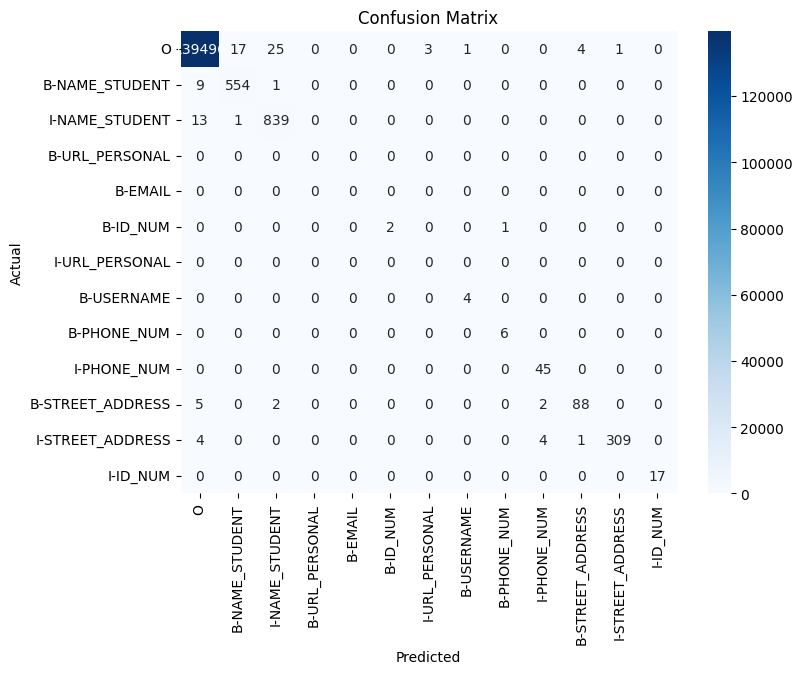


Classification Report:
                  precision    recall  f1-score   support

               O       0.99      1.00      0.99    139547
  B-NAME_STUDENT       0.97      0.98      0.98       564
  I-NAME_STUDENT       0.65      0.98      0.79       853
  B-URL_PERSONAL       0.00      0.00      0.00         0
         B-EMAIL       0.00      0.00      0.00         0
        B-ID_NUM       1.00      0.67      0.80         3
  I-URL_PERSONAL       0.00      0.00      0.00         0
      B-USERNAME       0.67      1.00      0.80         4
     B-PHONE_NUM       0.86      1.00      0.92         6
     I-PHONE_NUM       0.88      1.00      0.94        45
B-STREET_ADDRESS       0.95      0.91      0.93        97
I-STREET_ADDRESS       0.87      0.97      0.92       318
        I-ID_NUM       1.00      1.00      1.00        17

       micro avg       0.98      1.00      0.99    141454
       macro avg       0.68      0.73      0.70    141454
    weighted avg       0.98      1.00      0.9

In [32]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertForTokenClassification, AdamW, get_linear_schedule_with_warmup


# Place the model in evaluation mode
model.eval()

# Initialize lists to store true labels and predictions
true_labels = []
predictions = []

# Disable gradient calculation for efficiency
with torch.no_grad():
    for batch in test_dataloader:
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        # Forward pass
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

        # Get the predictions
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Store predictions and true labels
        # Apply softmax on logits and take the argmax to get the most likely label
        pred_flat = np.argmax(logits, axis=2).flatten()
        labels_flat = label_ids.flatten()

        # Extend the true labels and predictions lists
        true_labels.extend(labels_flat)
        predictions.extend(pred_flat)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions, labels=list(label_map.values()))

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

label_names = ['O', 'B-NAME_STUDENT', 'I-NAME_STUDENT', 'B-URL_PERSONAL', 'B-EMAIL',
               'B-ID_NUM', 'I-URL_PERSONAL', 'B-USERNAME', 'B-PHONE_NUM', 'I-PHONE_NUM',
               'B-STREET_ADDRESS', 'I-STREET_ADDRESS', 'I-ID_NUM']


# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()





report = classification_report(
    true_labels,
    predictions,
    labels=list(label_map.values()),
    target_names=list(label_map.keys()),
    zero_division=0  # Or 1, depending on how you want to handle these cases
)

# Print the classification report
print("\nClassification Report:")
print(report)
